In [126]:
#### specify path of Julia Code for 2D Models ####
### By default the working directory ./2D_Models ###
path = string( pwd(), "/2D_Models/")

"/home/jakob/Dokumente/Repositories/Modeling_Framework/2D_Models/"

In [194]:
##### include 2D Modelling Framework ####
include(string(path, "./2D_model_library.jl"));


########## OPERATIONAL ##########
##### how to chose the actual velocity? #####

#op_model = "Constant"
#op_model = "Collision_Free_Speed"
#op_model = "Collision_Free_Speed_XU"
#op_model = "RVO"
#op_model = "SocialForce"
#op_model = "AV_Model"
#op_model = "AV_IN_Model"
#op_model = "PowerLaw"
#op_model = "IN_Costfunction"
#op_model = "IN_Model"
#op_model = "SocialForce"
#op_model = "SocialForce_Elliptical_A"
#op_model = "SocialForce_Elliptical_B"
#op_model = "SocialForce_CollisionPrediction"
#op_model = "SocialForce_Rotation"
#op_model = "Centrifugal_Force"
op_model = "Generalized_Centrifugal_Force"


include_op_model(op_model, path)

########## TACTICAL ##########
#### how to chose the preferred velocity? ###

tact_model = "Constant"
#tact_model = "IN_Model"

include_tact_model(tact_model, path)


########## STRATEGIC ##########
### how to chose the desired velocity ###

strat_model = "Constant"
#strat_model = "Towards_Goal"
#strat_model = "Two_Goals"


include_strat_model(strat_model, path)


########## OPTIMIZATION SCHEME ##########
### If optimization of a cost-function is included, how to solve? ###

#optimization_scheme = "Regular_Sampling"
optimization_scheme = "Random_Sampling"

include_optimization_scheme(optimization_scheme, path)


##### which update scheme? #####

update = "Parallel_Update"
#update = "Step_Update"

include_update(update, path)


##### which order? i.e. Acceleration or Velocity based? ####
#order = "first"
order = "second"

include_order(order, path)


##### PERCEPTIONAL MODEL ####
perception_model = "None"
#perception_model = "Only_in_Front"

include_perception_model(perception_model, path)

The following parameters were given in chraibi_GeneralizedCentrifugalforceModel_2010:
[2.0, 1.7, 0.0, 0.0, 0.3, 0.0, 0.0, 0.5, 2.0, 0.5, 0.0, 0.0, 0.0, 0.0]
v_max, v_des, T, T2, l, step_time, τ_A, τ_R, α, β, ζ_h, ζ_v, r, λ


In [195]:

### of the system ###
N = 3
system_size = (100.0, 100.0) #important for periodic boundaries

### initialize geometry ###
geometrie = create_geometry_single_obstacle((37.5,31.5), 0.3)

### initialize crowd ###
menge = create_crowd(N, geometrie);
Init_Hom_Parameters!(p, menge)

a = menge.agent[1]
b = menge.agent[2]
c = menge.agent[3]

a.v_des = 0.0
a.e_des = (1.0, 0.0)
a.vel = 0.5
a.heading = normalize((1.0, 0.0))
a.e_pref = a.e_des
a.v_pref = a.v_des
a.l = 0.3


b.vel = 0.5
b.l = 0.3
b.heading = normalize((-1.0, 0.0))
b.pos = (0.0, 0.40) .- 0.0001

c.vel = 0.5
c.l = 0.3
c.heading = normalize((-1.0, 0.0))
c.pos = (0.0, -0.40) .+ 0.0001

Update_Neighborhood!(menge, geometrie, system_size, 5.0)

In [196]:
dx = 0.4
space = collect(-2.0+dx:dx:2.0-dx)

Grid_x, Grid_y, v_x, v_y = Calculate_Direction_Matrix(a, menge, geometrie, system_size, space, space)

([-1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.6, -1.2  …  1.2, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6], [-1.6, -1.2, -0.8, -0.4, 0.0, 0.4, 0.8, 1.2, 1.6, -1.6  …  1.6, -1.6, -1.2, -0.8, -0.4, 0.0, 0.4, 0.8, 1.2, 1.6], [-1.484619823513893, -1.6730003623340284, -1.844419161751754, -1.9605844242191812, -1.9999999990101274, -1.9606038878253023, -1.844435307776465, -1.672996966432946, -1.4845981908247003, -1.2968356400446164  …  0.3796247316168909, 0.373425448448308, 0.48051572454345615, 0.5948303087944484, 0.6850215121863514, 0.7190511615819469, 0.6849909261813092, 0.594792817161275, 0.48048887156460635, 0.37341099917779763], [-1.340113420434844, -1.0959332952466634, -0.7733808607425948, -0.3951059547882587, -6.292449058867646e-5, 0.3950093607046667, 0.7733423533129019, 1.095938479252444, 1.3401373854198781, -1.5225693162250673  …  0.46401849095875053, -0.34914585587157115, -0.33033534061114567, -0.26636178270217453, -0.1501841538586028, 2.349458200627541e-5, 0.1502172102455383

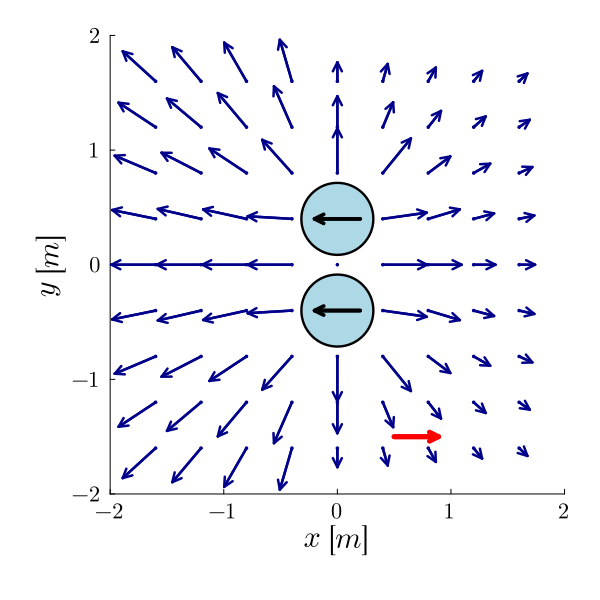

In [197]:
using Plots
using LaTeXStrings, ColorSchemes

Plots.scalefontsizes()
Plots.scalefontsizes(2)

plot(layout=(1,1), legend=:topleft, legendfontsize = 15, grid = false,
    xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

ϵ = 0.01
v_x, v_y = Round_Velocities(v_x, v_y, ϵ)

scale = (dx-0.01)/a.v_max

#plot velocity grid
scatter!(Grid_x, Grid_y, label =:false,  markersize=2, msw=0, color=:darkblue)
quiver!(Grid_x, Grid_y, quiver = scale .*(v_x, v_y), color =:darkblue, linewidth=2.5)


#plot agent b
scatter!(b.pos, label =:false,  markersize=40, msw=2, alpha = 1.0, color =:lightblue)

b_vel = -1 .*Δv(a, b)

if abs(b_vel) > 0.01
    quiver!([b.pos[1] + 0.2], [b.pos[2]], quiver = 0.4.*([b_vel[1]], [b_vel[2]]), color =:black, linewidth=3.8, thickness_scaling = 1)
end

#plot agent c
scatter!(c.pos, label =:false,  markersize=40, msw=2, alpha = 1.0, color =:lightblue)

c_vel = -1 .*Δv(a, c)

if abs(b_vel) > 0.01
    quiver!([c.pos[1] + 0.2], [c.pos[2]], quiver = 0.4.*([c_vel[1]], [c_vel[2]]), color =:black, linewidth=3.8, thickness_scaling = 1)
end

#reference velocity
quiver!([0.5], [-1.5], quiver = (scale*[2.0], [0.0]), color =:red, linewidth=5, thickness_scaling = 1)

plot!(xlabel=L"$x$ $[m]$")
plot!(ylabel=L"$y$ $[m]$")

x_min, x_max = -2, 2
y_min, y_max = -2, 2

x_ticks = collect(x_min:1:x_max)
y_ticks = collect(y_min:1:y_max)

plot!(yticks=(x_ticks, Create_LaTeXString(x_ticks)))
plot!(xticks=(y_ticks, Create_LaTeXString(y_ticks)))

plot!(xlims = [x_min, x_max])
plot!(ylims = [y_min, y_max])

plot!(size=(600,600), margin = 0.7Plots.cm)
#savefig(string("/home/jakob/Dokumente/Field_Lines_", op_model, ".png"))

In [186]:
a.pos = c.pos .- (1.0, 0.0)

(-0.9999, -0.39990000000000003)

In [149]:
ttc(a, b, system_size)

999

In [150]:
Min_TTC(a, a.v_pref, a.e_pref, menge, geometrie, system_size)

999.0

In [151]:
a.v_pref

0.0